# 傅里叶变换
傅里叶的原理表明，任何连续测量的时序或信号，都可以表示为不同频率的正弦波信号的无限叠加。利用傅立叶变换算法直接测量原始信号，以累加方式来计算该信号中不同正弦波信号的频率、振幅和相位就可以表示原始信号。
f(原始信号)=A1sin(w1x+ϕ1)+A2sin(w2x+ϕ2)+...
A代表振幅，w代表频率的变化，ϕ代表相位
振幅就是各个频率下的信号的决定程度有多大，如果某个频率的振幅越大，那么它对原始信号的的重要性越大，
相位表示其实表面对应频率下的正弦分量偏离原点的程度，

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

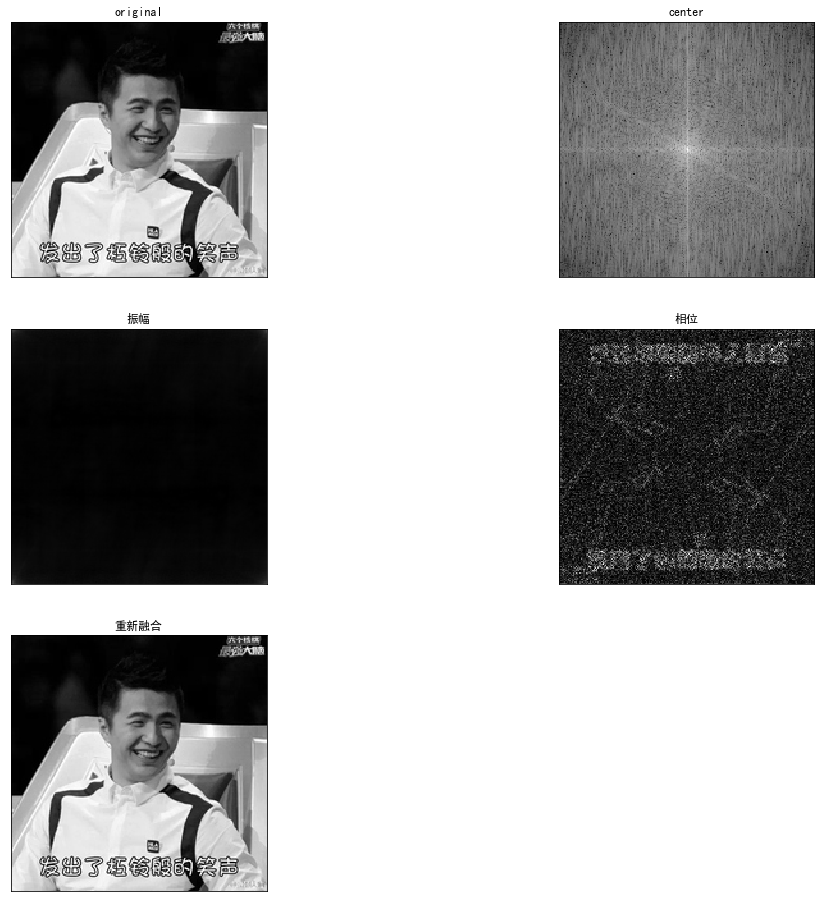

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(18,16))
img =cv2.imread('D:/Pictures/1.JPG',0)#读灰度图像
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（0-255）
s1 = np.log(np.abs(fshift))
ph_fshift = np.angle(fshift)

plt.subplot(321),plt.imshow(img,'gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(322),plt.imshow(s1,'gray'),plt.title('center')
plt.xticks([]),plt.yticks([])

#逆变换--取绝对值就是振幅
f1shift=np.fft.ifftshift(np.abs(fshift))
img_back=np.fft.ifft2(f1shift)
img_back = np.abs(img_back)
#调整范围
img_back= (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(323),plt.imshow(img_back,'gray'),plt.title('振幅')
plt.xticks([]),plt.yticks([])

f2shift = np.fft.ifftshift(np.angle(fshift))
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(324),plt.imshow(img_back,'gray'),plt.title('相位')
plt.xticks([]),plt.yticks([])

# 逆变换--将两者合成看看
s1 = np.abs(fshift) #取振幅
s1_angle = np.angle(fshift) #取相位
s1_real = s1*np.cos(s1_angle) #取实部
s1_imag = s1*np.sin(s1_angle) #取虚部
s2 = np.zeros(img.shape,dtype=complex) 
s2.real = np.array(s1_real) #重新赋值给s2
s2.imag = np.array(s1_imag)

f2shift = np.fft.ifftshift(s2) #对新的进行逆变换
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(325),plt.imshow(img_back,'gray'),plt.title('重新融合')
plt.xticks([]),plt.yticks([])


# 因为numpy取相位和振幅非常的方便，我们可以制作一些不同图像的频率域操作

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

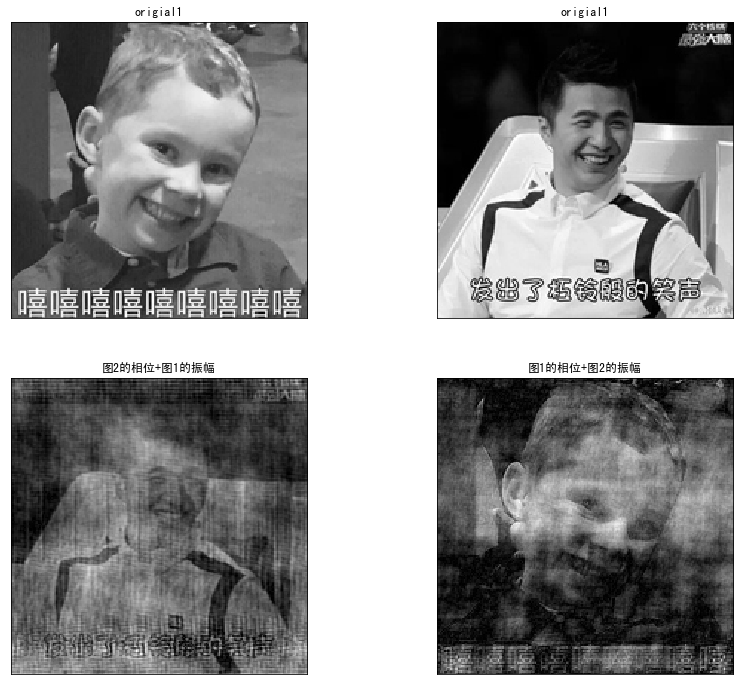

In [46]:
plt.figure(figsize=(14,12))
img1= cv2.imread('D:/Pictures/2.jpg',0)
img2=cv2.imread('D:/Pictures/1.jpg',0)
plt.subplot(221),plt.imshow(img1,'gray'),plt.title('origial1')
plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('origial1')
plt.xticks([]),plt.yticks([])

f1=np.fft.fft2(img1)
f1shift=np.fft.fftshift(f1)
f1_A=np.abs(f1shift)#取振幅
f1_B=np.angle(f1shift)#取相位

f2=np.fft.fft2(img2)
f2shift=np.fft.fftshift(f2)
f2_A=np.abs(f2shift)#取振幅
f2_B=np.angle(f2shift)#取相位

img_new1f=np.zeros(img1.shape,dtype=complex)
img_real=f1_A*np.cos(f2_B) #取实部
img1_img=f1_A*np.sin(f2_B) #取虚部
img_new1f.real=np.array(img_real)
img_new1f.imag=np.array(img1_img)
f3shift=np.fft.ifftshift(img_new1f) #对新的进行逆变换
img_new1=np.fft.ifft2(f3shift)
#出来的是复数
img_new1=np.abs(img_new1)
img_new1 = (img_new1-np.amin(img_new1))/(np.amax(img_new1)-np.amin(img_new1))
plt.subplot(223),plt.imshow(img_new1,'gray'),plt.title('图2的相位+图1的振幅')
plt.xticks([]),plt.yticks([])

img_new2_f = np.zeros(img2.shape,dtype=complex) 
img2_real = f2_A*np.cos(f1_B) #取实部
img2_imag = f2_A*np.sin(f1_B) #取虚部
img_new2_f.real = np.array(img2_real) 
img_new2_f.imag = np.array(img2_imag) 
f4shift = np.fft.ifftshift(img_new2_f) #对新的进行逆变换
img_new2 = np.fft.ifft2(f4shift)
#出来的是复数，无法显示
img_new2 = np.abs(img_new2)
#调整大小范围便于显示
img_new2 = (img_new2-np.amin(img_new2))/(np.amax(img_new2)-np.amin(img_new2))
plt.subplot(224),plt.imshow(img_new2,'gray'),plt.title('图1的相位+图2的振幅')
plt.xticks([]),plt.yticks([])


# 低通滤波，高通滤波

[[1 1 1 ... 1 1 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


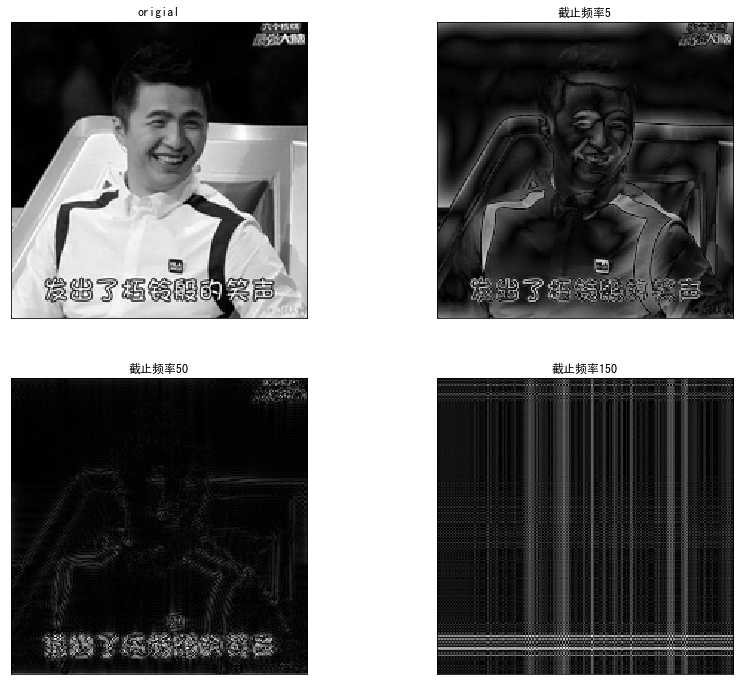

In [23]:
img_man = cv2.imread('D:/Pictures/1.jpg',0) #直接读为灰度图像
plt.figure(figsize=(14,12))
plt.subplot(221),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[int(rows/2-5):int(rows/2+5),int(cols/2-5):int(cols/2+5)] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(222),plt.imshow(img_new,'gray'),plt.title('截止频率5')
plt.xticks([]),plt.yticks([])

rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[int(rows/2-50):int(rows/2+50),int(cols/2-50):int(cols/2+50)] = 0
#--------------------------------
f2 = np.fft.fft2(img_man)
f2shift = np.fft.fftshift(f2)
f2shift = f2shift*mask
f3shift = np.fft.ifftshift(f2shift) #对新的进行逆变换
img_new1 = np.fft.ifft2(f3shift)
#出来的是复数，无法显示
img_new1 = np.abs(img_new1)
#调整大小范围便于显示
img_new1 = (img_new1-np.amin(img_new1))/(np.amax(img_new1)-np.amin(img_new1))
plt.subplot(223),plt.imshow(img_new1,'gray'),plt.title('截止频率50')
plt.xticks([]),plt.yticks([])

rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
aa=int(rows/2-150)
bb=int(rows/2+150)
cc=int(cols/2-150)
dd=int(cols/2+150)
if aa <=0:
    aa=1;
if bb>=255:
    bb=255
if cc<=0:
    cc=1
if dd>=255:
    dd=255
mask[aa:bb,cc:dd] = 0

#--------------------------------
f3 = np.fft.fft2(img_man)
f3shift = np.fft.fftshift(f3)
f3shift = f3shift*mask
f4shift = np.fft.ifftshift(f3shift) #对新的进行逆变换
img_new2 = np.fft.ifft2(f4shift)
#出来的是复数，无法显示
img_new2 = np.abs(img_new2)
#调整大小范围便于显示
img_new2 = (img_new2-np.amin(img_new2))/(np.amax(img_new2)-np.amin(img_new2))
plt.subplot(224),plt.imshow(img_new2,'gray'),plt.title('截止频率150')
plt.xticks([]),plt.yticks([])
print(mask)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


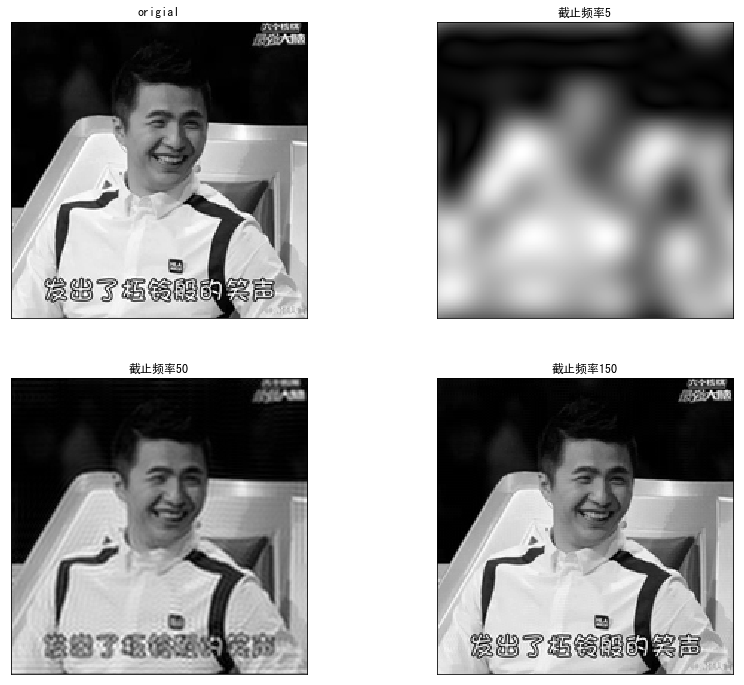

In [22]:
img_man = cv2.imread('D:/Pictures/1.jpg',0) #直接读为灰度图像
plt.figure(figsize=(14,12))
plt.subplot(221),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
mask[int(rows/2-5):int(rows/2+5),int(cols/2-5):int(cols/2+5)] = 1
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(222),plt.imshow(img_new,'gray'),plt.title('截止频率5')
plt.xticks([]),plt.yticks([])

rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
mask[int(rows/2-50):int(rows/2+50),int(cols/2-50):int(cols/2+50)] = 1
#--------------------------------
f2 = np.fft.fft2(img_man)
f2shift = np.fft.fftshift(f2)
f2shift = f2shift*mask
f3shift = np.fft.ifftshift(f2shift) #对新的进行逆变换
img_new1 = np.fft.ifft2(f3shift)
#出来的是复数，无法显示
img_new1 = np.abs(img_new1)
#调整大小范围便于显示
img_new1 = (img_new1-np.amin(img_new1))/(np.amax(img_new1)-np.amin(img_new1))
plt.subplot(223),plt.imshow(img_new1,'gray'),plt.title('截止频率50')
plt.xticks([]),plt.yticks([])

rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
#mask[int(rows/2-150):int(rows/2+150),int(cols/2-150):int(cols/2+150)] = 1
aa=int(rows/2-150)
bb=int(rows/2+150)
cc=int(cols/2-150)
dd=int(cols/2+150)
if aa <= 0:
    aa=1;
if bb>=255:
    bb=255
if cc<=0:
    cc=1
if dd>=255:
    dd=255
mask[aa:bb,cc:dd] = 1
#--------------------------------
f3 = np.fft.fft2(img_man)
f3shift = np.fft.fftshift(f3)
f3shift = f3shift*mask
f4shift = np.fft.ifftshift(f3shift) #对新的进行逆变换
img_new2 = np.fft.ifft2(f4shift)
#出来的是复数，无法显示
img_new2 = np.abs(img_new2)
#调整大小范围便于显示
img_new2 = (img_new2-np.amin(img_new2))/(np.amax(img_new2)-np.amin(img_new2))
plt.subplot(224),plt.imshow(img_new2,'gray'),plt.title('截止频率150')
plt.xticks([]),plt.yticks([])
print(mask)

# prcess 5
对一副图像加噪，进行几何均值，算术均值，谐波，逆谐波处理

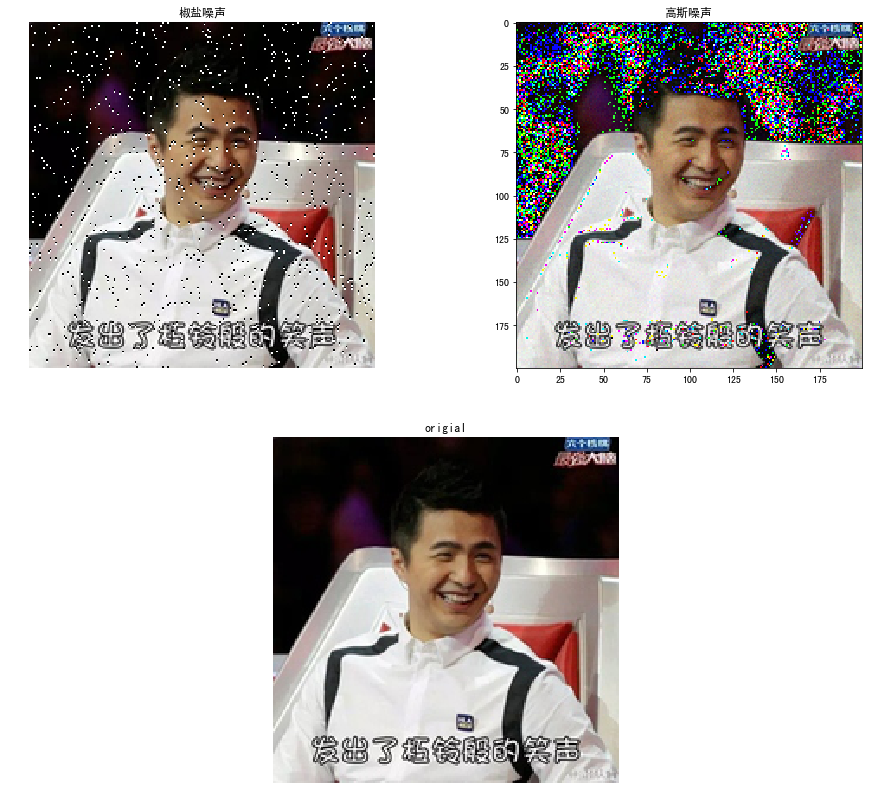

In [86]:
doctorWei=cv2.imread('D:Pictures/1.JPG')
plt.figure(figsize=(16,14))
doctorWei = cv2.resize(cv2.cvtColor(doctorWei,cv2.COLOR_BGR2RGB),(200,200))
plt.subplot(212)
plt.imshow(doctorWei)
plt.axis("off")
plt.title('origial')

#添加高斯噪声
image=0
image=doctorWei
row,col,ch =image.shape
mean=0
gauss=np.random.normal(mean,25,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy=image+guass
image=noisy
plt.subplot(222)
plt.title("高斯噪声")
plt.imshow(image.astype(np.uint8))

#添加椒盐噪声
image1=0
image1=doctorWei
rows,cols,dims=image1.shape
for i in range(1000):
    x = np.random.randint(0, rows)
    y = np.random.randint(0, cols)
    image1[x, y, :] = 255
    image1[x-1, y, :] = 0
plt.subplot(221)
plt.title("椒盐噪声")
plt.imshow(image1)
plt.axis('off')



plt.show()

# 算术均值滤波器即求某一范围内图像的均值，几何滤波也是根据特定公式进行滤波。

In [87]:
def ArithmeticMeanOperator(roi):
    return np.mean(roi)
def ArithmeticMeanAlogrithm(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = ArithmeticMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbArithmeticMean(image):
    r,g,b = cv2.split(image)
    r = ArithmeticMeanAlogrithm(r)
    g = ArithmeticMeanAlogrithm(g)
    b = ArithmeticMeanAlogrithm(b)
    return cv2.merge([r,g,b])
def GeometricMeanOperator(roi):
    roi = roi.astype(np.float64)
    p = np.prod(roi)
    return p**(1/(roi.shape[0]*roi.shape[1]))
    
def GeometricMeanAlogrithm(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = GeometricMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)

def rgbGemotriccMean(image):
    r,g,b = cv2.split(image)
    r = GeometricMeanAlogrithm(r)
    g = GeometricMeanAlogrithm(g)
    b = GeometricMeanAlogrithm(b)
    return cv2.merge([r,g,b])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


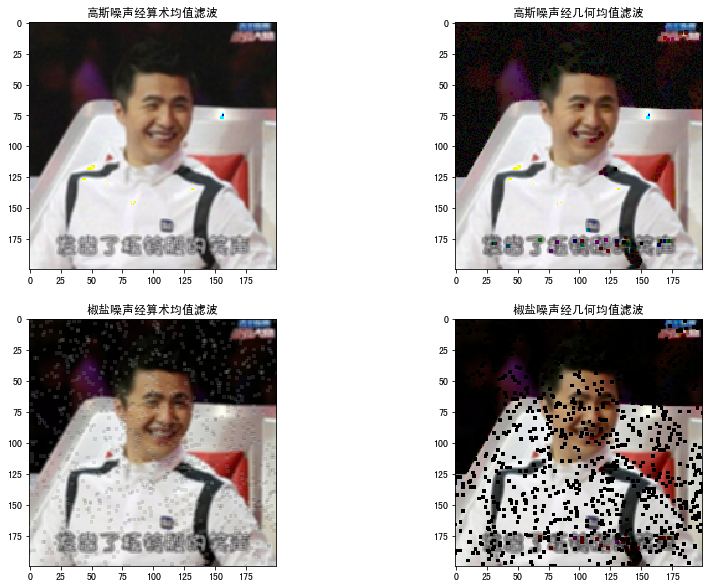

In [88]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('高斯噪声经算术均值滤波')
plt.imshow(rgbArithmeticMean(image))

plt.subplot(222)
plt.title('高斯噪声经几何均值滤波')
plt.imshow(rgbGemotriccMean(image))

plt.subplot(223)
plt.title('椒盐噪声经算术均值滤波')
plt.imshow(rgbArithmeticMean(image1))

plt.subplot(224)
plt.title('椒盐噪声经几何均值滤波')
plt.imshow(rgbGemotriccMean(image1))
plt.show()

In [95]:
import scipy
import scipy.stats
def HMeanOperator(roi):
    roi = roi.astype(np.float64)
    roi = np.abs(roi)
    if 0 in roi:
        roi = 0
    else:
        roi = scipy.stats.hmean(roi.reshape(-1))
    return roi
def HMeanAlogrithm(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] =HMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbHMean(image):
    r,g,b = cv2.split(image)
    r = HMeanAlogrithm(r)
    g = HMeanAlogrithm(g)
    b = HMeanAlogrithm(b)
    return cv2.merge([r,g,b])
def IHMeanOperator(roi,q):
    roi = roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,q):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = IHMeanOperator(image[i-1:i+2,j-1:j+2],q)
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbIHMean(image,q):
    r,g,b = cv2.split(image)
    r = IHMeanAlogrithm(r,q)
    g = IHMeanAlogrithm(g,q)
    b = IHMeanAlogrithm(b,q)
    return cv2.merge([r,g,b])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


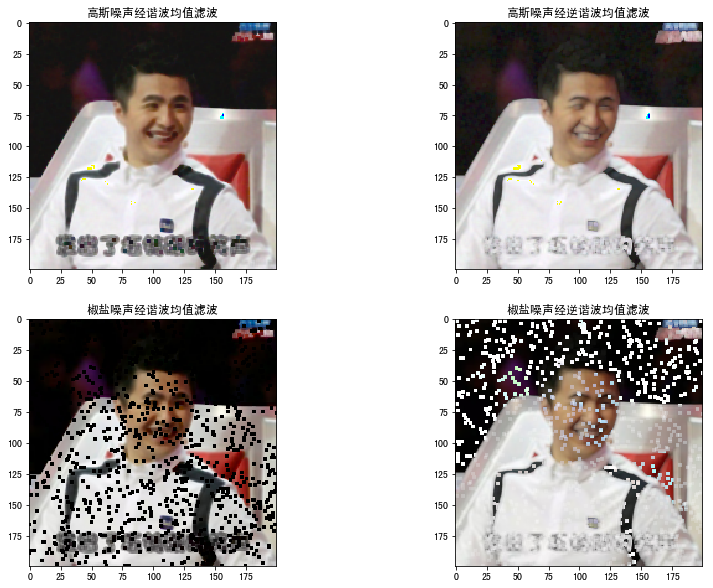

In [99]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('高斯噪声经谐波均值滤波')
plt.imshow(rgbHMean(image))

plt.subplot(222)
plt.title('高斯噪声经逆谐波均值滤波')
plt.imshow(rgbIHMean(image,2))

plt.subplot(223)
plt.title('椒盐噪声经谐波均值滤波')
plt.imshow(rgbHMean(image1))

plt.subplot(224)
plt.title('椒盐噪声经逆谐波均值滤波')
plt.imshow(rgbIHMean(image1,2))
plt.show()

# 可以看出处理椒盐噪声仍然有问题，谐波和逆谐波皆如此